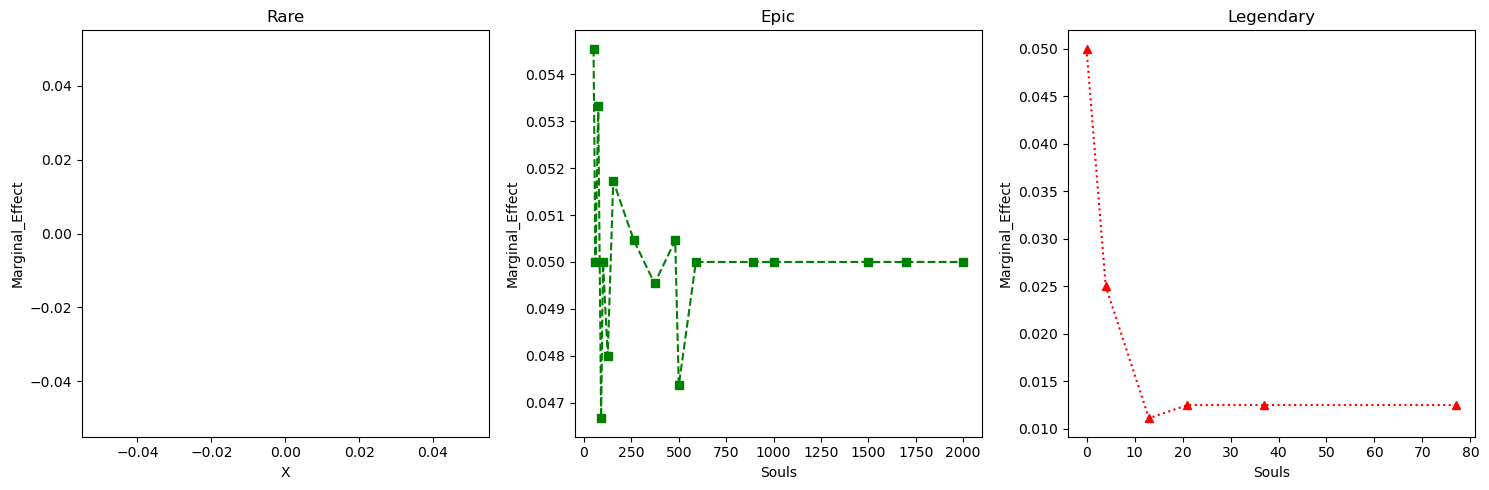

In [75]:
import pandas as pd
import statsmodels.api as sm

#df = pd.read_csv('Radiant_Souls.csv')

# Calculate differences in Souls and Chance
df['Souls_diff'] = df['Souls'].diff()
df['Chance_diff'] = df['Chance'].diff()

# Calculate marginal effect as the ratio of Chance_diff to Souls_diff
df['Marginal_Effect'] = df['Chance_diff'] / df['Souls_diff']

# Drop NaN values resulting from the differences
df.dropna(inplace=True)
df = df.iloc[1:-1]

# Split dataframe by Rarity
rare = df[df['Rarity'] == 'Rare']
epic = df[df['Rarity'] == 'Epic']
legendary = df[df['Rarity'] == 'Legendary']

# Create fig for plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

# Plot for df1
ax1.plot(rare['Souls'], rare['Marginal_Effect'], marker='o', linestyle='-', color='b')
ax1.set_title('Rare')
ax1.set_xlabel('X')
ax1.set_ylabel('Marginal_Effect')

# Plot for df2
ax2.plot(epic['Souls'], epic['Marginal_Effect'], marker='s', linestyle='--', color='g')
ax2.set_title('Epic')
ax2.set_xlabel('Souls')
ax2.set_ylabel('Marginal_Effect')

# Plot for df3
ax3.plot(legendary['Souls'], legendary['Marginal_Effect'], marker='^', linestyle=':', color='r')
ax3.set_title('Legendary')
ax3.set_xlabel('Souls')
ax3.set_ylabel('Marginal_Effect')

# Adjust layout
plt.tight_layout()

#Save plot to pdf
plt.savefig('plot')

# Display the plot
plt.show()

In [77]:
legendary[1:]

,Rarity,Souls,Chance,Souls_diff,Chance_diff,Marginal_Effect
25,Legendary,4,0.1,4.0,0.1,0.025000
26,Legendary,13,0.2,9.0,0.1,0.011111
27,Legendary,21,0.3,8.0,0.1,0.012500
28,Legendary,37,0.5,16.0,0.2,0.012500
29,Legendary,77,1.0,40.0,0.5,0.012500
